In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\spam.csv')
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## 1. Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
# Renaming the cols
df.rename(columns={'Category':'Target'},inplace=True)

In [4]:
df.sample(3)

,Target,Message
3822,ham,You are right though. I can't give you the spa...
2830,spam,Send a logo 2 ur lover - 2 names joined by a h...
1296,ham,TELL HER I SAID EAT SHIT.


In [5]:
# To convert categorical data into numerical by using labelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

415

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

##2. EDA

In [11]:
df['Target'].value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

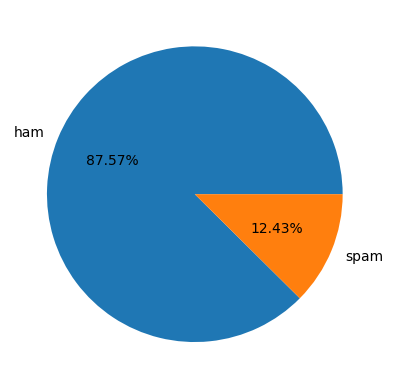

In [12]:
# visulize the data being spam or ham
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct = '%.2f%%')
plt.show()

The pie chart shows,
 * 87.57% data being ham
 * 12.43% data being spam

That's mean Data is imbalanced. so we need to balanced the data.

In [13]:
import nltk

In [14]:
# check the length of characters to store in new column
df['num_characters'] = df['Message'].apply(len)


In [15]:
df.head(3)

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# check the no_of_words in the msg which store in new column, by using nlp library nltk
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head(2)

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [19]:
# check the no_of_sentence which store in num_sentences
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head(2)

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [21]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# only extract the ham dataset
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# only extract the spam dataset
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


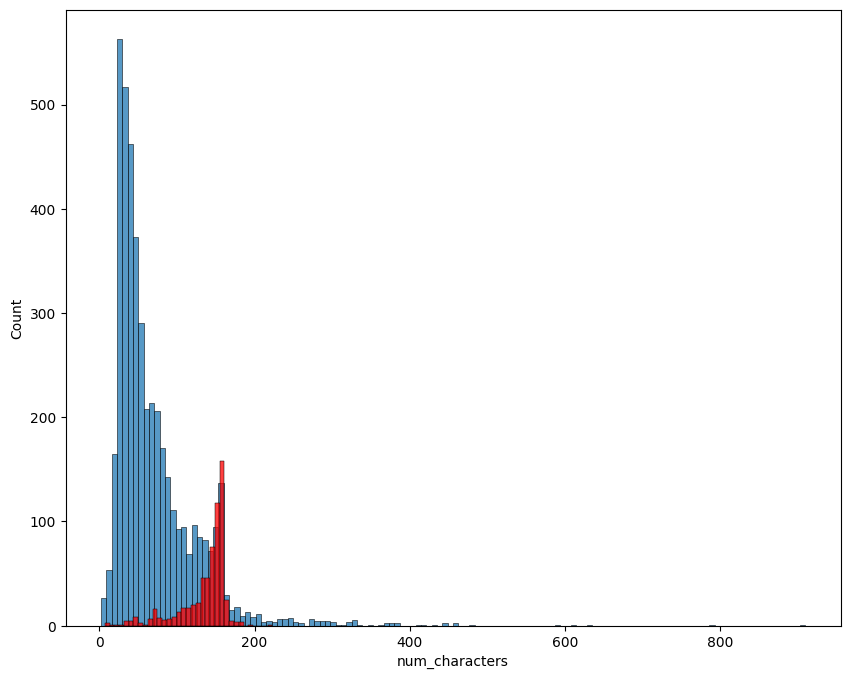

In [24]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color = 'red')
plt.show()

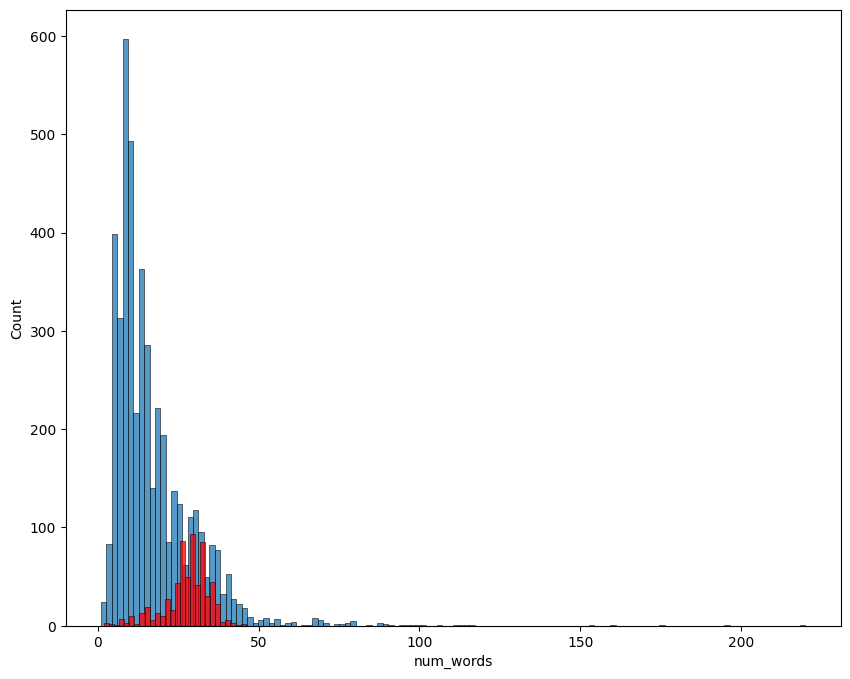

In [25]:
# visulize the spam words
plt.figure(figsize=(10,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color = 'red')
plt.show()

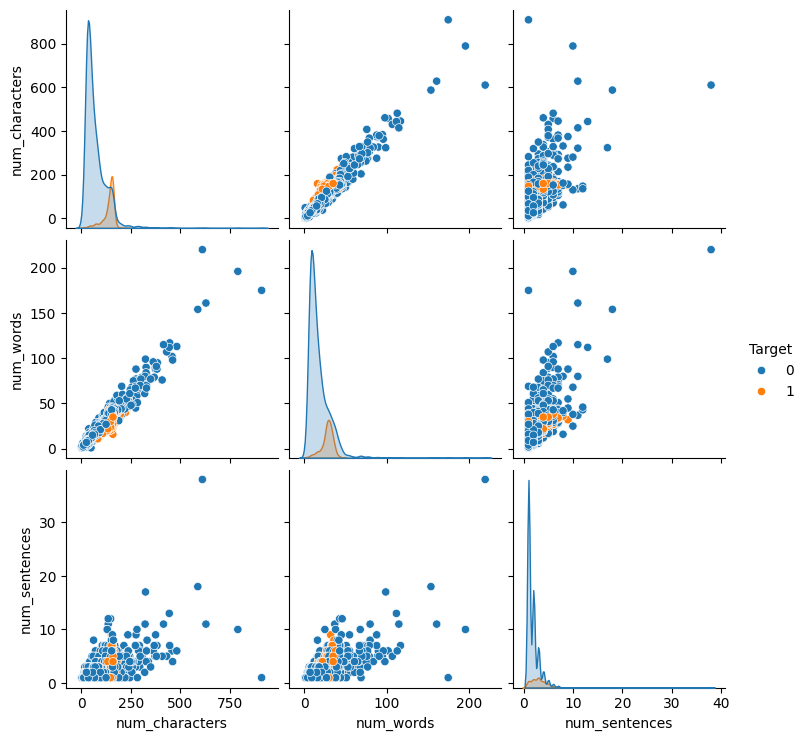

In [26]:
# visulize the pairplot to find the correlation
sns.pairplot(df,hue='Target')

<Axes: >

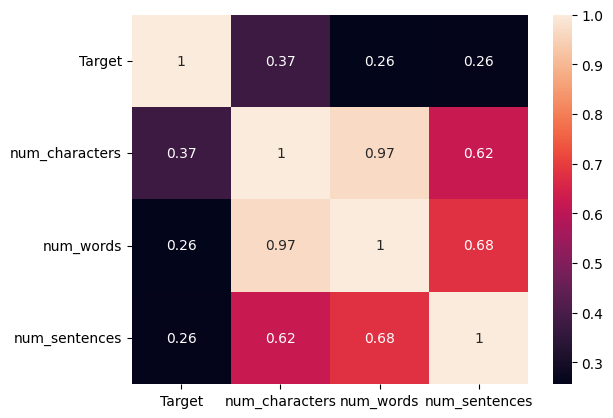

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
   * Lower case
   * Tokenization
   * Removing special characters
   * Removing stop words and punctuation
   * Stemming

In [28]:
df.head(2)

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# make the funtion transform_text for Data Preprocessing
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y= []
  for i in text:
    if i.isalnum():
      y.append(i)

  # write a logic for remove stopword also punctuation
  text = y[:] # assign  y data into text, so text has all the lower case text
  y.clear() # y is clear so it empty

  for i in text:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
      y.append(i)

 # write a logic for stemming a text
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [31]:
# we can also find the stopword like this
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
# generate the punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
# create a stemming object
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [34]:
df['Transform_message']=df['Message'].apply(transform_text)

In [35]:
df.head(2)

,Target,Message,num_characters,num_words,num_sentences,Transform_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [36]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size = 10,background_color = 'white')
spam_wc = wc.generate(df[df['Target']==1]['Transform_message'].str.cat(sep=""))

plt.figure(figsize=(10,6))
plt.imshow(spam_wc) # it shows the images

ModuleNotFoundError: No module named 'wordcloud'

The worldcloud shows the mostly used text.

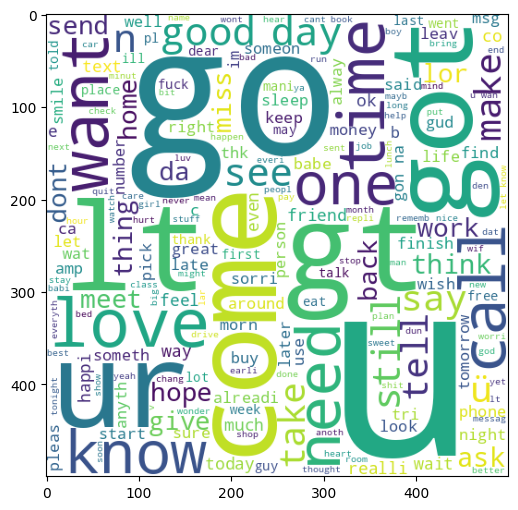

In [ ]:
spam_wc = wc.generate(df[df['Target']==0]['Transform_message'].str.cat(sep=""))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [ ]:
# to convert the spam transform messages to list also extract the most relevent word
spam_corpus = []
for msg in df[df['Target']==1]['Transform_message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [ ]:
len(spam_corpus)

9781

In [ ]:
import seaborn as sns
from collections import Counter
# to add the most common 30 apam word in the Dataframe
top30_spam_word = pd.DataFrame(Counter(spam_corpus).most_common(20))
top30_spam_word

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


<ipython-input-42-97411ba4de8b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top30_spam_word[0],y=top30_spam_word[1],palette = "Blues")


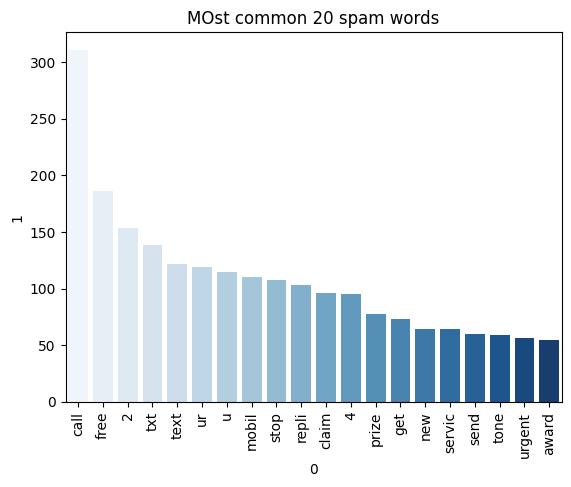

In [ ]:
sns.barplot(x = top30_spam_word[0],y=top30_spam_word[1],palette = "Blues")
plt.xticks(rotation='vertical')
plt.title('MOst common 20 spam words')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['Target']==0]['Transform_message'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

<ipython-input-44-07dd25f036c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1],palette='Blues')


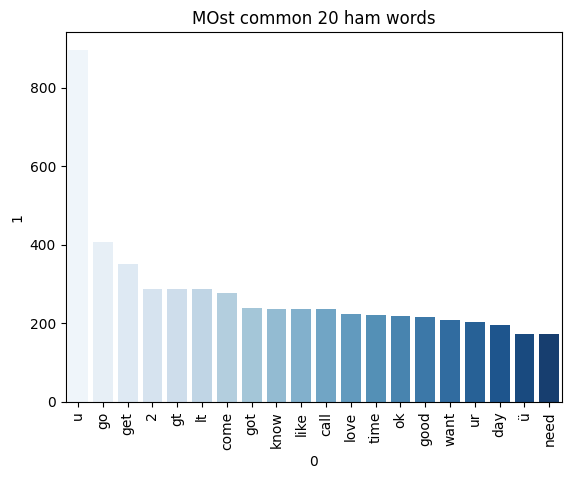

In [ ]:
# data store in list so we convert it into dataframe
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(20))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(20))[1],palette='Blues')
plt.xticks(rotation='vertical')
plt.title('MOst common 20 ham words')
plt.show()

## 4. Model Building

Naive bayes algorithm is suitable for Texual data.

We can vectorize a corpus into 2 method:
 * CountVectorizer
 * TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

### Using CountVectorizer method

In this dataset CountVetorizer method doesn't predict good model.

   That's why we train the data using tfidf model.

###  Using TfidfVectorizer


In [ ]:
X = tfidf.fit_transform(df['Transform_message']).toarray()
y= df['Target'].values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,precision_score,confusion_matrix

In [ ]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb = BernoulliNB()

In unbalanced data, accuracy score is dosen't matter, so we check precision score.

In [ ]:
# Using GaussianNB
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8691860465116279
0.4824561403508772
[[787 118]
 [ 17 110]]


In [ ]:
# MultinomialNB
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9612403100775194
1.0
[[905   0]
 [ 40  87]]


In [ ]:
# Using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9718992248062015
0.9711538461538461
[[902   3]
 [ 26 101]]


* We use MultinomialNB in TfidfVectorizer model, Because it has an highest prescion score.